# Visión por Computadora

### Alan Reyes-Figueroa

# SIFT detector

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from scipy.signal import correlate2d, convolve2d

from skimage import data
from skimage.transform import warp, AffineTransform

from skimage.color import rgb2gray, gray2rgb
from skimage.transform import resize
from PIL import Image

import cv2

# Read Image

In [2]:
I = cv2.imread('chair.jpeg')
J = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
print(J.shape)

(379, 398)


In [3]:
II = np.array(I)
JJ = rgb2gray(II)
print(JJ.shape)

(379, 398)


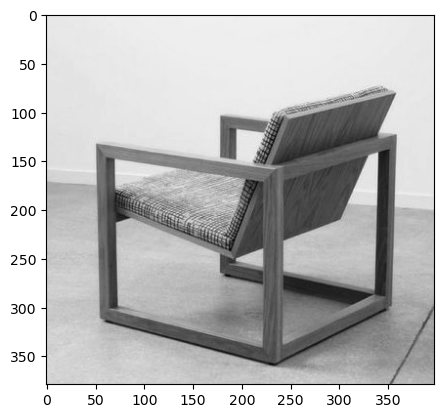

In [4]:
plt.figure()
plt.imshow(JJ, cmap='gray')
plt.show()

In [5]:
sift = cv2.SIFT_create()
kp   = sift.detect(J, None)

In [6]:
img = cv2.drawKeypoints(J, kp, I)
Img = np.array(img)

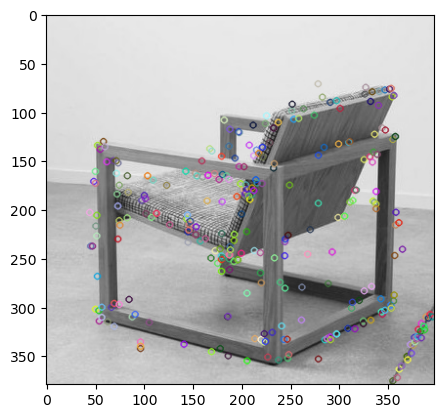

In [7]:
plt.figure()
plt.imshow(Img)
plt.show()

In [8]:
keypoints, descriptors = sift.detectAndCompute(J, None)

In [9]:
descriptors.shape

(320, 128)

In [10]:
descriptors[0]

array([  2.,   2.,  14.,  55., 139.,   1.,   0.,   0., 139.,   3.,   1.,
        17.,  84.,   1.,   0.,  14., 106.,  10.,   5.,   0.,   0.,   0.,
         0.,   5.,   0.,   1.,   9.,   1.,   0.,   1.,   0.,   0.,  16.,
        15., 120., 139.,  41.,   7.,   1.,   1., 139.,  34.,  20.,  41.,
        18.,   0.,   0.,   5., 102.,  23.,  21.,   1.,   0.,   0.,   0.,
         0.,   0.,   2.,  31.,   1.,   0.,   0.,   0.,   0.,  26.,   5.,
        20.,  33.,  29., 139.,  84.,  19., 139.,  15.,   5.,   3.,   3.,
        20.,  24.,  79.,  63.,  14.,  21.,   5.,   0.,   5.,  20.,  14.,
         0.,   0.,  23.,   4.,   0.,   5.,   9.,   0.,   7.,   3.,  13.,
        26.,  83., 105.,  45.,   8., 139.,   0.,   0.,   3.,  33.,  24.,
        18., 108.,  29.,   0.,   0.,   0.,   0.,  20.,  89.,  41.,   0.,
         0.,   1.,   0.,   0.,  19.,  53.,   0.], dtype=float32)

In [11]:
imgg = cv2.drawKeypoints(J, kp, I, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
Imgg = np.array(imgg)

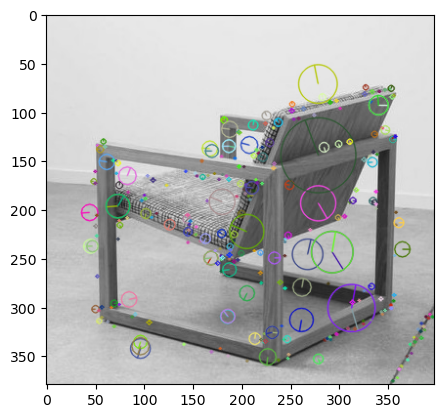

In [12]:
plt.figure()
plt.imshow(Imgg)
plt.show()

# Second Image

In [13]:
w, h = J.shape
M = cv2.getRotationMatrix2D((10, 10), -10, 1.0)
R = cv2.warpAffine(J, M, (w, h))
RR = np.array(R)

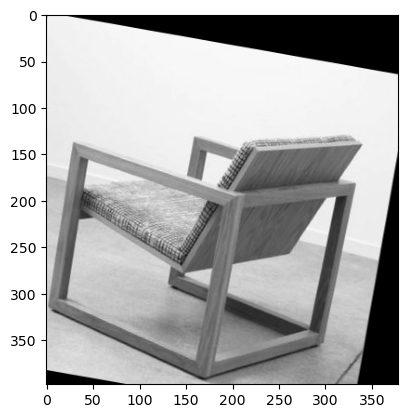

In [14]:
plt.figure()
plt.imshow(RR, cmap='gray')
plt.show()

In [15]:
sift2 = cv2.SIFT_create()
kp2   = sift2.detect(R, None)

In [16]:
img2 = cv2.drawKeypoints(R, kp2, R)
Img2 = np.array(img2)

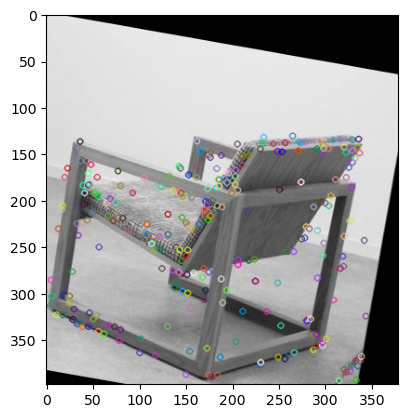

In [17]:
fig = plt.figure()
plt.imshow(Img2, cmap='gray')
plt.show()

In [18]:
imgg2 = cv2.drawKeypoints(R, kp2, R, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
Imgg2 = np.array(imgg2)

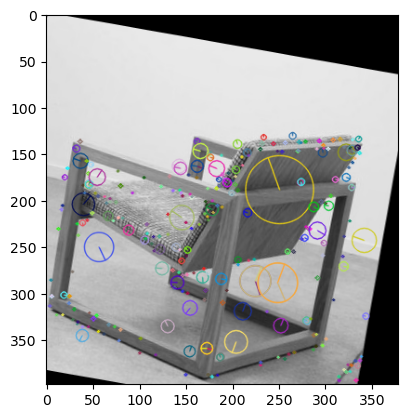

In [19]:
fig = plt.figure()
plt.imshow(Imgg2, cmap='gray')
plt.show()

# Matcher

In [20]:
# detect key points and compute descriptors

keypoints1, descriptors1 = sift.detectAndCompute(J, None)
keypoints2, descriptors2 = sift.detectAndCompute(R, None)

In [21]:
# create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# match descriptors of both images
matches = bf.match(descriptors1, descriptors2)

In [22]:
# sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)

# draw first 10 matches
k = 100
matched_img = cv2.drawMatches(J, keypoints1, R, keypoints2, matches[:k], R, flags=2)

In [23]:
Matched = np.array(matched_img)

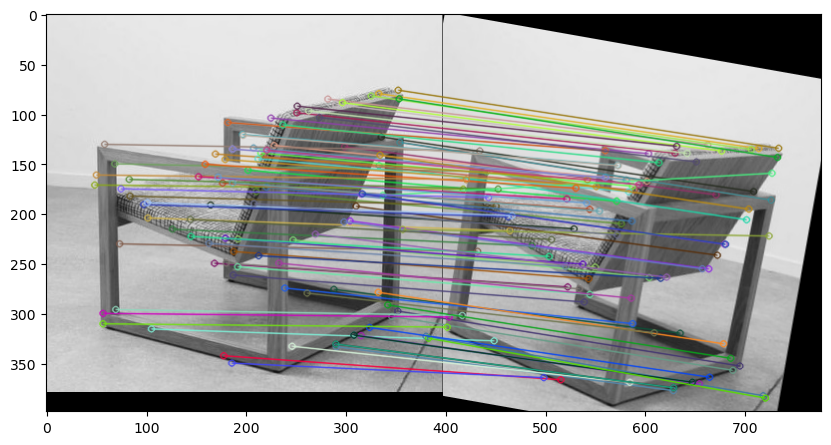

In [24]:
fig = plt.figure(figsize=(10,8))
plt.imshow(Matched, cmap='gray')
plt.show()

In [25]:
descriptors1.shape

(320, 128)

In [26]:
descriptors1[0]

array([  2.,   2.,  14.,  55., 139.,   1.,   0.,   0., 139.,   3.,   1.,
        17.,  84.,   1.,   0.,  14., 106.,  10.,   5.,   0.,   0.,   0.,
         0.,   5.,   0.,   1.,   9.,   1.,   0.,   1.,   0.,   0.,  16.,
        15., 120., 139.,  41.,   7.,   1.,   1., 139.,  34.,  20.,  41.,
        18.,   0.,   0.,   5., 102.,  23.,  21.,   1.,   0.,   0.,   0.,
         0.,   0.,   2.,  31.,   1.,   0.,   0.,   0.,   0.,  26.,   5.,
        20.,  33.,  29., 139.,  84.,  19., 139.,  15.,   5.,   3.,   3.,
        20.,  24.,  79.,  63.,  14.,  21.,   5.,   0.,   5.,  20.,  14.,
         0.,   0.,  23.,   4.,   0.,   5.,   9.,   0.,   7.,   3.,  13.,
        26.,  83., 105.,  45.,   8., 139.,   0.,   0.,   3.,  33.,  24.,
        18., 108.,  29.,   0.,   0.,   0.,   0.,  20.,  89.,  41.,   0.,
         0.,   1.,   0.,   0.,  19.,  53.,   0.], dtype=float32)

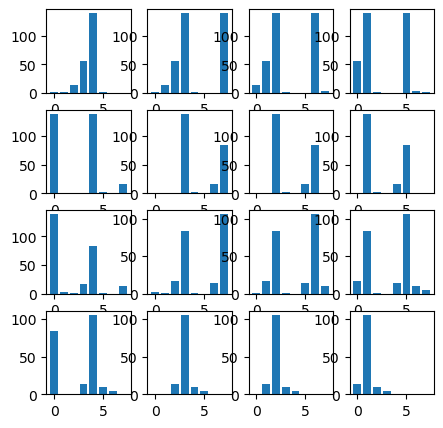

In [27]:
idx = 0
rows = 4
cols = 4
bins = 8

plt.figure(figsize=(5,5))
for i in range(0, rows):
    for j in range(0, cols):
        plt.subplot(rows, cols, i*cols + j + 1)
        plt.bar(x=np.arange(0,8), height=descriptors1[idx][i*cols+j:i*cols+j+bins])
plt.show()

# Otros Descriptores

Existen otros descriptores que funcionan de manera similar a SIFT:

* SURF
* FAST
* BRIEF
* ORB

# ORB

In [28]:
orb = cv2.ORB_create()

In [29]:
kp = orb.detect(J, None)

In [30]:
kp, des = orb.compute(J, kp)

In [31]:
img3 = cv2.drawKeypoints(J, kp, None, color=(0,255,0), flags=0)
Img3 = np.array(img3)

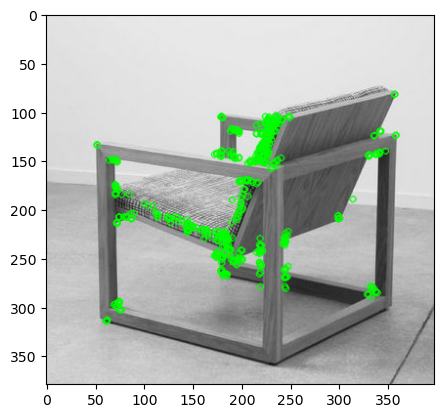

In [32]:
plt.figure()
plt.imshow(Img3, cmap='gray')
plt.show()

In [33]:
des.shape

(494, 32)

In [34]:
des[0]

array([ 89,  29, 123, 103, 118, 254, 127,  55, 116, 232, 127, 118, 123,
        55, 146, 112, 118, 190,  21,   8, 249, 184, 117,  14, 103, 239,
       182, 128, 111, 194, 224, 121], dtype=uint8)